# Test cases of exponential model
> Author: Luyu Ruan

In [15]:
from cmath import exp
import os
import sys

from numpy import size
sys.path.insert(0, os.path.abspath('..'))

from bayesml import exponential

import numpy as np
import matplotlib.pyplot as plt
def visualize_pdf(func):
    p_range = np.linspace(0,10,endpoint=False)
    fig, ax = plt.subplots()
    ax.plot(p_range,func.pdf(p_range))
    ax.set_xlabel("p")
    ax.set_ylabel("probability (density)")
    plt.show()

# GenModel Test cases

case1: 
- `lam=0.1`
- `N=20`

case2: 
- `lam=1.0`
- `N=20`

case3: 
- `h_alpha=5.0`
- `h_beta=2.0`
- call `gen_params`
- fetch `lam` via `get_params`

case4: 
- visualize model from case3 via `visualize_model`

Test case 1 =================================
[21.44092462 30.47058696  2.68220505  0.81330838  0.21740542  3.6922548
  0.57124813  1.2253361   5.18475978  0.44093871  1.66226435 29.5627424
 11.614767   24.83860995 18.88800363 17.30370471  9.20139883  2.06925512
  7.72179948 24.76764369]
Test case 2 =================================
[0.74110011 0.83379564 2.02454951 0.59429317 1.76437394 1.89559492
 1.89763641 1.06883348 1.10266392 1.85205238 0.27975578 1.63532338
 1.36591212 0.12687565 0.60379184 2.77993355 1.09224907 0.51902643
 0.53367273 3.18695883]
Test case 3 =================================
{'lam': array([1.72253789])}
Test case 4 =================================
lam:[1.72253789]


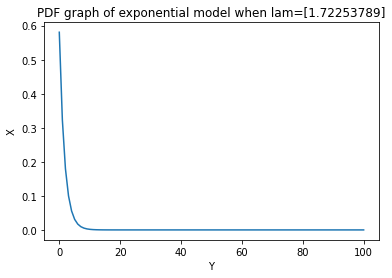

X0:[0.11586349 0.71298737 0.00692144 ... 0.53307875 0.0452325  0.19992738]


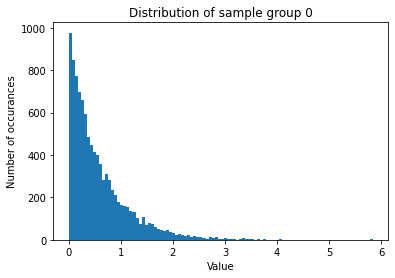

In [19]:



gen_model = exponential.GenModel(lam=0.1)
gen_model2 = exponential.GenModel(lam=1)

# case 1: 
print("Test case 1 =================================")
print(gen_model.gen_sample(20))

# case 2: 
print("Test case 2 =================================")
print(gen_model2.gen_sample(20))

gen_model3 = exponential.GenModel(h_alpha=5.0,h_beta=2.0)
gen_model3.gen_params()

# case 3: 
print("Test case 3 =================================")
print(gen_model3.get_params())

# case 4: 
print("Test case 4 =================================")
gen_model3.visualize_model(graph_len=100,hist_bins=100,sample_size=10000, sample_num=1)


# LearnModel test cases

Test case 1

- Set `lam=1.753`
- Estimate parameters via `estimate_params` 4 times


Test case 2
- `lam=1.753`
- Estimate parameters via `estimate_params` with `loss="squared" "0-1" "abs" "KL"`

Test case 3
- Predict next sample via `make_prediction` with `loss="squared" "0-1" "abs" "KL"`

Test case 1 =================================
predict lambda (Sample number: 1):  2.8188978925192867


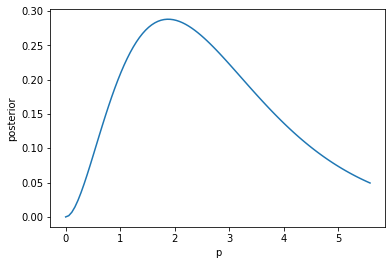

predict lambda (Sample number: 16):  1.846889533891723


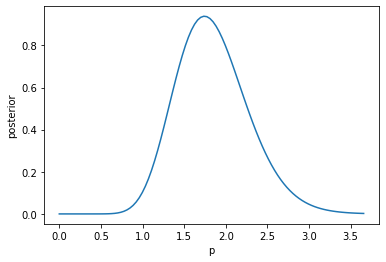

predict lambda (Sample number: 256):  1.6090264738175546


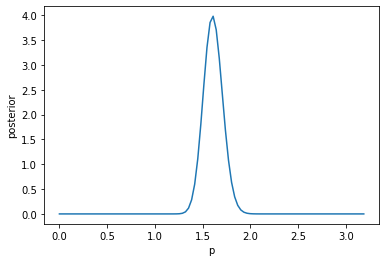

predict lambda (Sample number: 4096):  1.7561480356983614


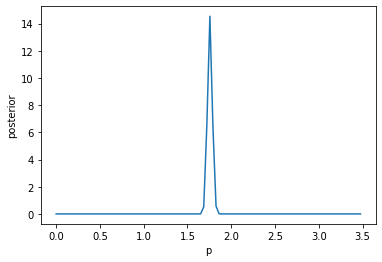

Test case 2 =================================
abs 1.7560051918201605
0-1 1.7557194978663218
squared 1.7561480356983614
KL <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027032F47340>
Test case 3 =================================
abs 0.3947308485390965
0-1 0
squared 0.5695670642236832
KL <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027032E6B3A0>


In [21]:
import bayesml.bernoulli as ber


learn_model = exponential.LearnModel()
gen_model = exponential.GenModel(lam=1.753)

POWER = 4
BASE = 16
N=BASE ** POWER
X = gen_model.gen_sample(N)


# Test case 1
print("Test case 1 =================================")
for i in range(POWER):
    curN = BASE ** i
    learn_model.reset_hn_params()
    learn_model.update_posterior(X[0:curN])
    print(f'predict lambda (Sample number: {curN}): ', learn_model.estimate_params(loss="squared"))
    learn_model.visualize_posterior()

lossList = {"squared","0-1", "abs", "KL"}

# Test case 2
print("Test case 2 =================================")
for loss in lossList:
    print(loss, learn_model.estimate_params(loss=loss))


# Test case 3
print("Test case 3 =================================")
learn_model.calc_pred_dist()
for loss in lossList:
    print(loss, learn_model.make_prediction(loss=loss))
